In [91]:
import tensorflow as tf
from tensorflow import keras as keras
import numpy as np 
import matplotlib.pyplot as plt
import os

train_data = os.path.join(os.curdir, "Data")
train_images = tf.keras.preprocessing.image_dataset_from_directory(data, image_size=(64, 64), shuffle=True, color_mode='rgb', batch_size=64)

test_data = os.paht.join(os.curdir, "Data", "Train")

Found 196997 files belonging to 1 classes.


<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

In [92]:
"""
Data transformation
"""
def transformation(image, _):
    img = image/255
    return (img, img)

images = images.map(transformation)

for image in images.take(1):
    print(image)

(<tf.Tensor: shape=(64, 64, 64, 3), dtype=float32, numpy=
array([[[[0.5921569 , 0.48235294, 0.39607844],
         [0.5764706 , 0.45882353, 0.3647059 ],
         [0.5411765 , 0.40392157, 0.31764707],
         ...,
         [0.14901961, 0.09019608, 0.00784314],
         [0.14901961, 0.09019608, 0.        ],
         [0.14117648, 0.09411765, 0.        ]],

        [[0.5882353 , 0.47843137, 0.39607844],
         [0.6       , 0.47843137, 0.39607844],
         [0.5882353 , 0.4509804 , 0.3647059 ],
         ...,
         [0.14509805, 0.08627451, 0.01176471],
         [0.13725491, 0.09019608, 0.        ],
         [0.13333334, 0.09411765, 0.        ]],

        [[0.5647059 , 0.45882353, 0.38431373],
         [0.59607846, 0.4862745 , 0.40392157],
         [0.6       , 0.4745098 , 0.38431373],
         ...,
         [0.13725491, 0.08627451, 0.01176471],
         [0.13333334, 0.09019608, 0.00392157],
         [0.1254902 , 0.09803922, 0.        ]],

        ...,

        [[0.27450982, 0.41568628, 

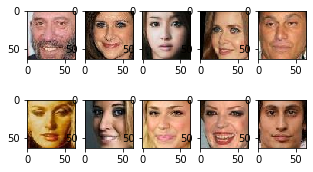

In [94]:
def plot_tensors(tensors):
    fig=plt.figure(figsize=(5, 3))
   
    for i in range(1, 10+1, 1):
        fig.add_subplot(2, 5, i)
        plt.imshow(np.array(tensors[i - 1]).reshape((64,64,3)))
    plt.plot()

def get_ten_images(dataset):
    result = []
    for image in dataset.take(10):
        result.append(np.array(image[0][0]))
    return result

plot_tensors(get_ten_images(images))

In [95]:
"""
Auto Encoder Method of genertaing real faces
"""
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([64, 64, 3], input_shape=[64, 64, 3]),
    keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='selu'),
    
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='selu'),

    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(64*2, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2), # Output shape will be (4, 4, 128)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='selu', input_shape=[4, 4, 128]),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='selu'),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding='same', activation='selu'),
    keras.layers.Conv2DTranspose(3,  kernel_size=3, strides=2, padding='same', activation='selu'),
    keras.layers.Reshape([64, 64, 3])
])

stacked_autoencoder = keras.models.Sequential([conv_encoder, conv_decoder])

opt = keras.optimizers.Adam(learning_rate=0.01)
stacked_autoencoder.compile(loss='mse', metrics=[rounded_accuracy], optimizer=opt)
stacked_autoencoder.summary()
                                              

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_82 (Sequential)   (None, 4, 4, 128)         97440     
_________________________________________________________________
sequential_83 (Sequential)   (None, 64, 64, 3)         97315     
Total params: 194,755
Trainable params: 194,755
Non-trainable params: 0
_________________________________________________________________


In [97]:
best_model = keras.callbacks.ModelCheckpoint(f"Best Model.h5", save_best_only = True)
epochs = 1000

stacked_autoencoder.fit(images, epochs=epoches, callbacks=best_model)

Epoch 1/1000
  14/3079 [..............................] - ETA: 14:54 - loss: 0.0271 - rounded_accuracy: 0.7895

KeyboardInterrupt: 